# Problem 2: Logistic Regression and LDA

## Problem Statement:
You are hired by a tour and travel agency which deals in selling holiday packages. You are provided details of 872 employees of a company. Among these employees, some opted for the package and some didn't. You have to help the company in predicting whether an employee will opt for the package or not on the basis of the information given in the data set. Also, find out the important factors on the basis of which the company will focus on particular employees to sell their packages.

## Data Dictionary:

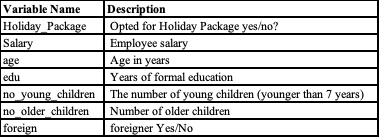

In [1]:
# Numerical libraries
import numpy as np   

# To run logistic regression
from sklearn.linear_model import LogisticRegression

# To run LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# To handle data in form of rows and columns 
import pandas as pd    

# Importing ploting libraries
import matplotlib.pyplot as plt 

# Importing seaborn for statistical plots
import seaborn as sns

# Importing numpy for list and series operations
import numpy as np

# To split the data into train test and split
from sklearn.model_selection import train_test_split,GridSearchCV

# Model performance parameters
from sklearn import metrics
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix

# Importing math for mathematical functions
import math

# To enable plotting graphs in Jupyter notebook
# %matplotlib inline 

In [2]:
# Importing the data
df_holiday = pd.read_csv('Holiday_Package.csv')

In [3]:
# Shape of the data
df_holiday.shape

(872, 8)

In [4]:
# First 5 entries in the data
df_holiday.head()

,Unnamed: 0,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,1,no,48412,30,8,1,1,no
1,2,yes,37207,45,8,0,1,no
2,3,no,58022,46,9,0,0,no
3,4,no,66503,31,11,2,0,no
4,5,no,66734,44,12,0,2,no


## Exploratory Data Analysis

In [5]:
# Obtaining the list of the columns in the data set
print('The columns in the data set are:')
for ind, i in enumerate(df_holiday.columns):
    print('%d. %s'%(ind+1, i))

The columns in the data set are:
1. Unnamed: 0
2. Holliday_Package
3. Salary
4. age
5. educ
6. no_young_children
7. no_older_children
8. foreign


It is observed that the column 'Unnamed: 0' is an index for the entire data set. So it does not play an important role in the analysis and hence we will drop it.

In [6]:
# Dropping the Unnamed:0 column
df_holiday.drop(columns='Unnamed: 0', axis=0, inplace=True)

In [7]:
# Checking if the column s dropped out
df_holiday

,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,no,48412,30,8,1,1,no
1,yes,37207,45,8,0,1,no
2,no,58022,46,9,0,0,no
3,no,66503,31,11,2,0,no
4,no,66734,44,12,0,2,no
...,...,...,...,...,...,...,...
867,no,40030,24,4,2,1,yes
868,yes,32137,48,8,0,0,yes
869,no,25178,24,6,2,0,yes
870,yes,55958,41,10,0,1,yes


In [8]:
# Checking for the info of the raw data
df_holiday.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 872 entries, 0 to 871
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Holliday_Package   872 non-null    object
 1   Salary             872 non-null    int64 
 2   age                872 non-null    int64 
 3   educ               872 non-null    int64 
 4   no_young_children  872 non-null    int64 
 5   no_older_children  872 non-null    int64 
 6   foreign            872 non-null    object
dtypes: int64(5), object(2)
memory usage: 47.8+ KB


-	The columns Holiday_Pakage and foreign are nominal categories and so are object data type.
-	The other columns are all integer data type
-	All columns have 872 entries and so there are no NaN or blank value sin the data


In [9]:
# 5 number summary of the continuous data
df_holiday.describe().T

,count,mean,std,min,25%,50%,75%,max
Salary,872.0,47729.172018,23418.668531,1322.0,35324.0,41903.5,53469.5,236961.0
age,872.0,39.955275,10.551675,20.0,32.0,39.0,48.0,62.0
educ,872.0,9.307339,3.036259,1.0,8.0,9.0,12.0,21.0
no_young_children,872.0,0.311927,0.612870,0.0,0.0,0.0,0.0,3.0
no_older_children,872.0,0.982798,1.086786,0.0,0.0,1.0,2.0,6.0


In [10]:
# Summary of categorical data
df_holiday.describe(include='object').T

,count,unique,top,freq
Holliday_Package,872,2,no,471
foreign,872,2,no,656


-	The Holiday_Package and foreign variables are mostly binary
-	age and educ seems to be normally distributed but may have outliers
-	no_young_children and no_older_children have very eneven distribution as they are natural numbers and not continuous

Here the Holiday_Package is the target variable.

--------

### Univariate analysis

In [11]:
# Lets make a list for continuous and categorical variables. This will make it easy for analysis
cont = ['Salary', 'age', 'educ', 'no_young_children', 'no_older_children']
cat = ['Holliday_Package', 'foreign' ]

In [12]:
# User defined function to get upper and lower whisker values for each column
def remove_outlier(col):
    col = col.dropna()
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

<AxesSubplot:>

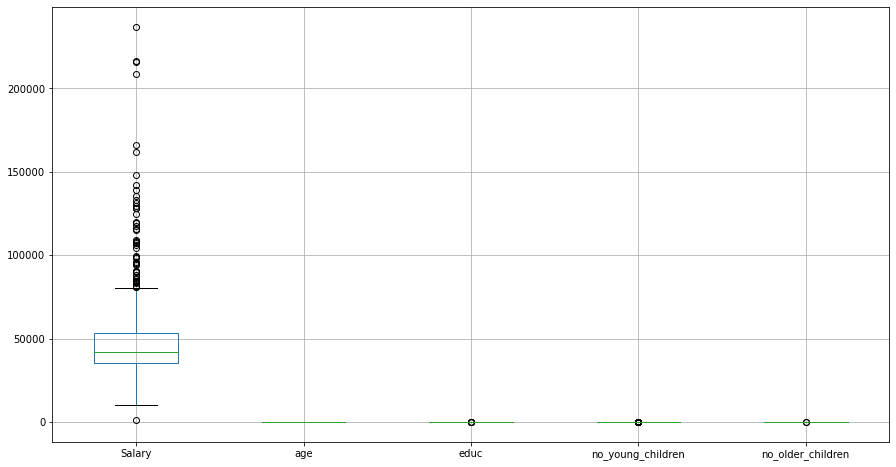

In [13]:
# Plotting the box plot for the data
plt.figure(figsize=(15,8))
df_holiday.boxplot()

Salary


/Users/nihalt/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/nihalt/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/nihalt/opt/anaconda3/lib/python3.8/site-packages/seaborn/_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


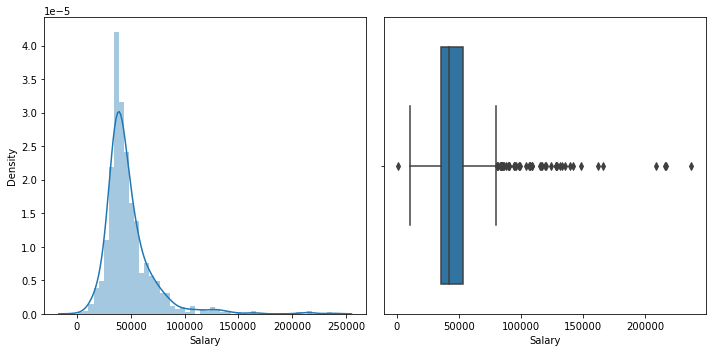

Salary is Positive or Right skewed.
The number of outliers in Salary is 57

---------------------------------------------------------------------------------------
age


/Users/nihalt/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/nihalt/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/nihalt/opt/anaconda3/lib/python3.8/site-packages/seaborn/_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


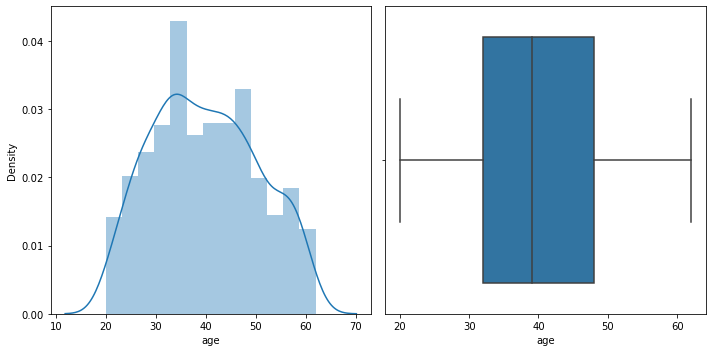

age is Positive or Right skewed.
The number of outliers in age is 0

---------------------------------------------------------------------------------------
educ


/Users/nihalt/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/nihalt/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/nihalt/opt/anaconda3/lib/python3.8/site-packages/seaborn/_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


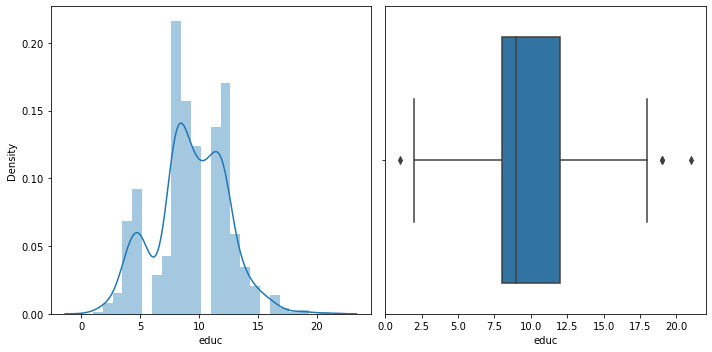

educ is Negative or Left skewed.
The number of outliers in educ is 4

---------------------------------------------------------------------------------------
no_young_children


/Users/nihalt/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/nihalt/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/nihalt/opt/anaconda3/lib/python3.8/site-packages/seaborn/_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


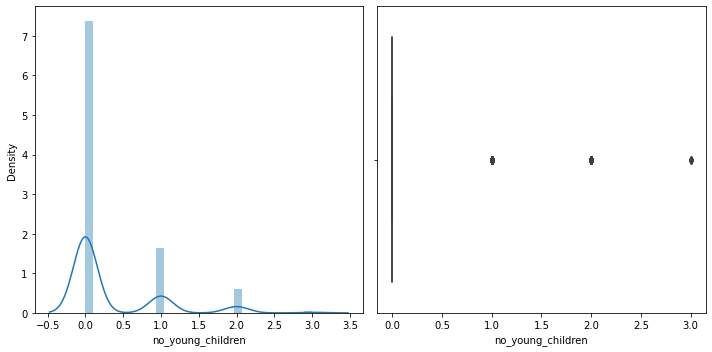

no_young_children is Positive or Right skewed.
The number of outliers in no_young_children is 207

---------------------------------------------------------------------------------------
no_older_children


/Users/nihalt/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/nihalt/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/nihalt/opt/anaconda3/lib/python3.8/site-packages/seaborn/_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


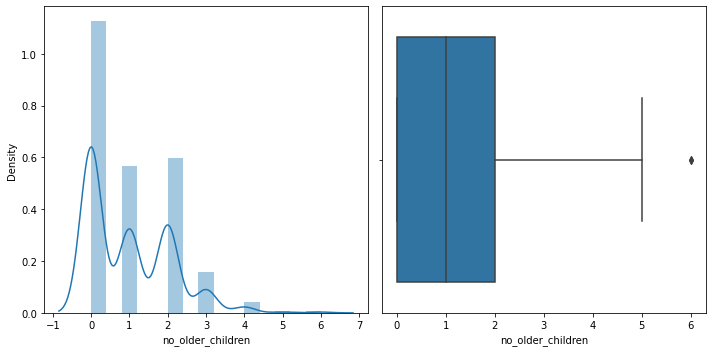

no_older_children is Positive or Right skewed.
The number of outliers in no_older_children is 2

---------------------------------------------------------------------------------------


In [14]:
# Univariate analysis that plots the distribution plot, barplot, skewness and the number of outliers
data = df_holiday[cont].copy()
for i in data:
    print('\033[1m'+i+'\033[1m')
    fig, axes = plt.subplots(ncols=2)
    fig.set_size_inches(10,5)
    sns.distplot(data[i] , ax=axes[:][0], label=i)
    sns.boxplot(data[i] , orient = "v" , ax=axes[:][1])
    plt.tight_layout()
    plt.show()
    skew = data[i].skew()
    if(skew > 0):
        print('%s is Positive or Right skewed.' %(i))
    elif(skew < 0):
        print('%s is Negative or Left skewed.' %(i))
    else:
        print('%s is not skewed.' %(i))
    lratio,uratio=remove_outlier(data[i])
    print('The number of outliers in %s is %d\n'% (i,((data[i]>uratio) | (data[i]<lratio)).sum()))
    print('---------------------------------------------------------------------------------------')



Holliday_Package

The number of unique entries in the column Holliday_Package : 2

The entry with the highest frequency in Holliday_Package : no



/Users/nihalt/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


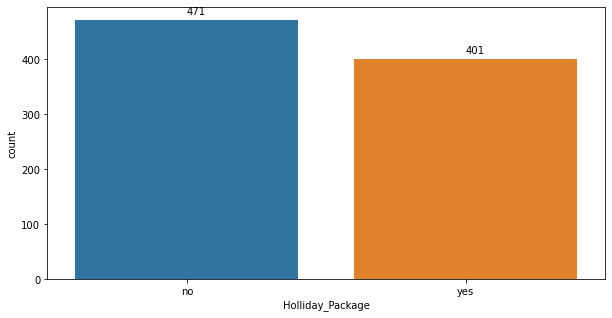

Percentage share:

no     54.013761
yes    45.986239
Name: Holliday_Package, dtype: float64
---------------------------------------------------------------------------------------


foreign

The number of unique entries in the column foreign : 2

The entry with the highest frequency in foreign : no



/Users/nihalt/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


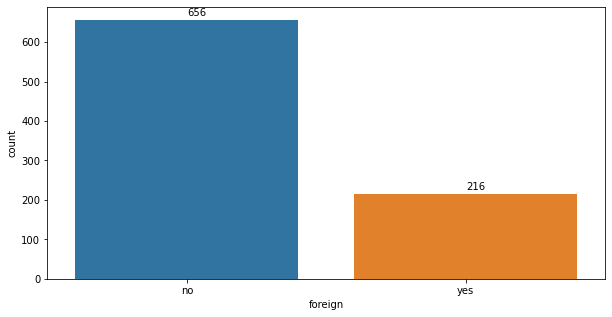

Percentage share:

no     75.229358
yes    24.770642
Name: foreign, dtype: float64
---------------------------------------------------------------------------------------


In [15]:
# Univariate analysis for the categorical data
data = df_holiday[cat].copy()
for j in cat:
    print('\n\n\033[1m'+j+'\033[0m\n')
    print('The number of unique entries in the column %s : %d\n'%(j, data[j].nunique()))
    print('The entry with the highest frequency in %s : %s\n'%(j, data[j].mode()[0]))
    fig, axes = plt.subplots(ncols=1)
    fig.set_size_inches(10,5)
    sns.countplot(data[j])
    for p in axes.patches:
        axes.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+(p.get_width()/2), p.get_height()+10))
    plt.show()
    print('Percentage share:\n')
    print(data[j].value_counts(normalize=True)*100)
    print('---------------------------------------------------------------------------------------')

- Salary is very close to normal distribution
- All other continuous variables are multi-modal
- Except age all other variables have outliers
- The majority class in both the categorical variables is 'no'

**The Holiday_Package variable is the target variable**

### Bivariate Analysis

Salary vs Holiday_Package 


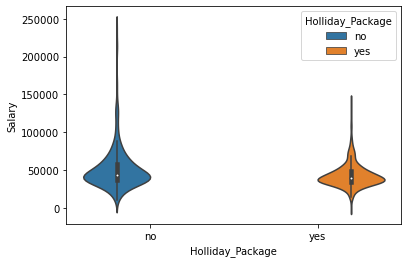

---------------------------------------------------------------------------------------
age vs Holiday_Package 


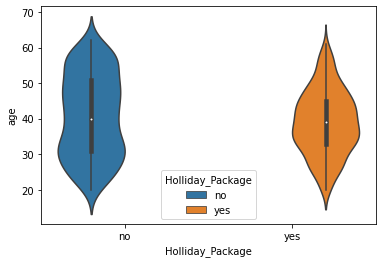

---------------------------------------------------------------------------------------
educ vs Holiday_Package 


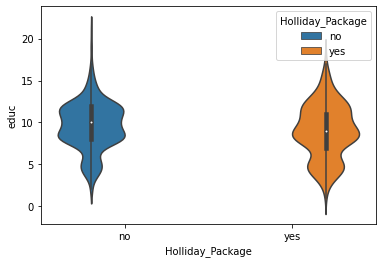

---------------------------------------------------------------------------------------
no_young_children vs Holiday_Package 


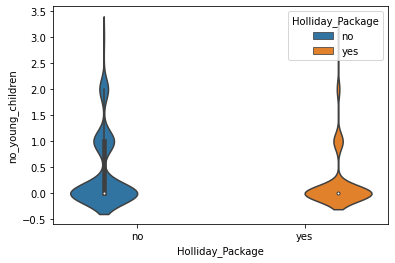

---------------------------------------------------------------------------------------
no_older_children vs Holiday_Package 


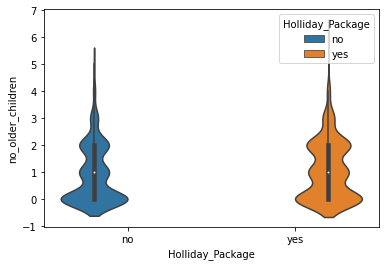

---------------------------------------------------------------------------------------


In [16]:
# Plotting the cotinuous variables against the target variable (Holiday Package)
for i in cont:
    if i != 'price':
        print('\033[1m'+i+' vs '+'Holiday_Package \033[1m')
        sns.violinplot(data=df_holiday, x='Holliday_Package', y=i, hue='Holliday_Package', ci=False)
        plt.show()
        print('---------------------------------------------------------------------------------------')

foreign vs Holiday_Package 


/Users/nihalt/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


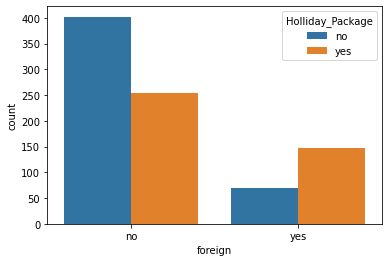

---------------------------------------------------------------------------------------


In [17]:
# Plotting the cotinuous variables against the target variable (Holiday Package)
for i in cat:
    if i != 'Holliday_Package':
        print('\033[1m'+i+' vs '+'Holiday_Package \033[1m')
        sns.countplot(df_holiday[i],hue=df_holiday['Holliday_Package'])
        plt.show()
        print('---------------------------------------------------------------------------------------')

-	Middle age group (30-50) tend to buy the holiday package than the age groups
-	There is a greater chunk in far lower and far higher years of education groups tend to buy the holiday package than who do not.
-	Foreign nationals have a higher tendency to buy the holiday package than non-foreign nationals.

-----

### Multi-variate 

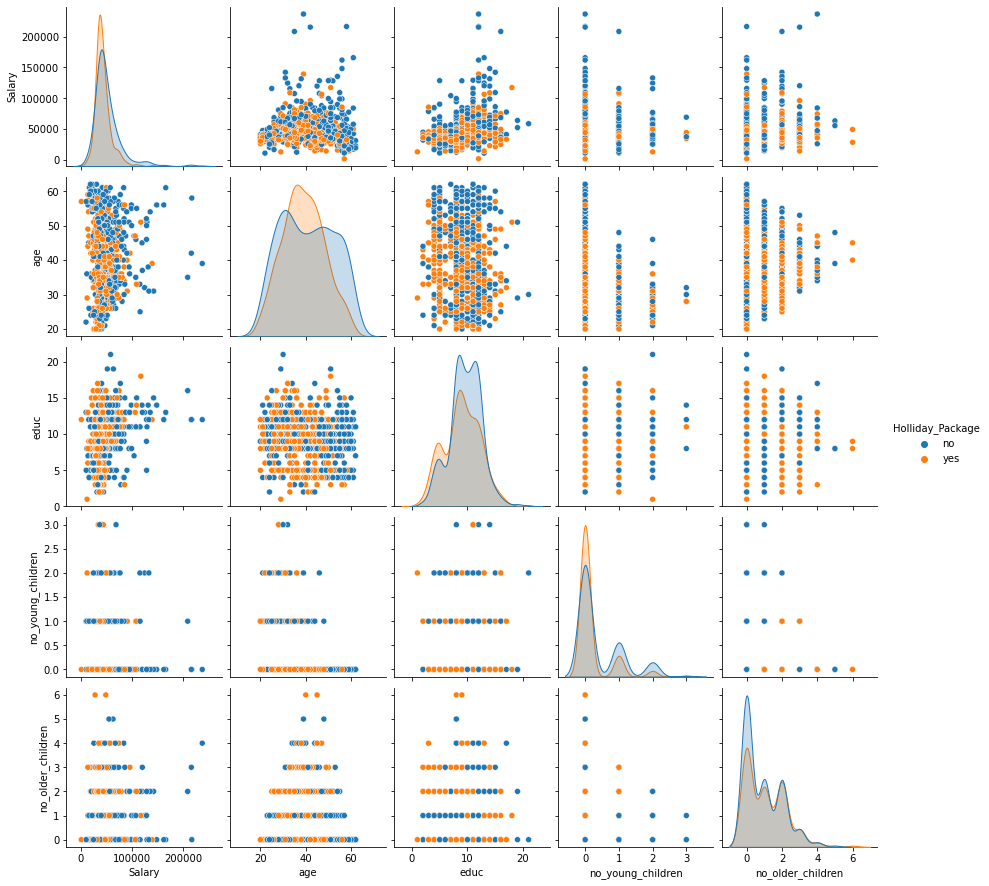

In [18]:
# Pair plot
sns.pairplot(df_holiday, hue='Holliday_Package')

<AxesSubplot:>

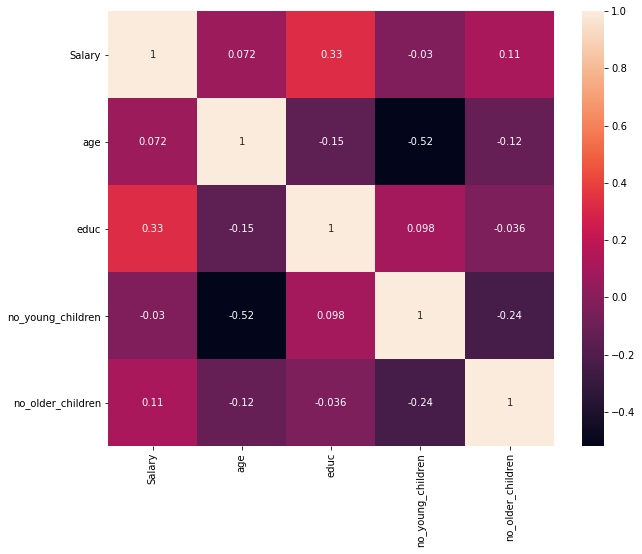

In [19]:
# To find the correlation between the variables
plt.figure(figsize=(10,8))
sns.heatmap(df_holiday.corr(), annot=True)

-	In the diagonal distribution graphs, the graphs for both the classes are almost overlapping and we can see that all of them are week predictors of the target variable.
-	There is very little correlation between the predictor variables.

----

### Validation checks on the data

In [20]:
# Age>Educ
df_holiday[df_holiday['age']<=df_holiday['educ']]

,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign


-----

### Outlier Treatment

In [21]:
# Replacing all outliers with the nearest whisker value
data = df_holiday.copy()
for i in data[cont]: 
    if i != 'price':
        lr,ur=remove_outlier(data[i])
        data[i]=np.where(data[i]>ur,ur,data[i])
        data[i]=np.where(data[i]<lr,lr,data[i])

<AxesSubplot:>

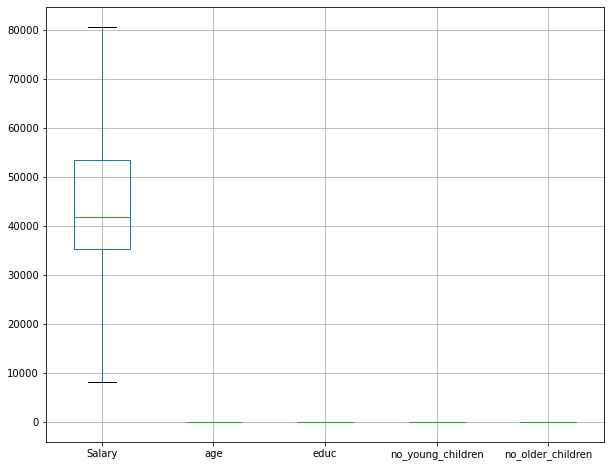

In [22]:
# Checking if outliers have been removed
plt.figure(figsize=(10,8))
data.boxplot()

-----

## Encoding

The columns Holliday_Package and foreign are object data type we will convert them into 1 and 0 so that it is converted into numerical data type.

In [23]:
# Label Encoding
data[['Holliday_Package', 'foreign']] = data[['Holliday_Package', 'foreign']].replace('yes',1)
data[['Holliday_Package', 'foreign']] = data[['Holliday_Package', 'foreign']].replace('no',0)

In [24]:
# Chacking the data type of the data frame
data.dtypes

Holliday_Package       int64
Salary               float64
age                  float64
educ                 float64
no_young_children    float64
no_older_children    float64
foreign                int64
dtype: object

----

## Modeling

In [25]:
# Splitting the data into predictor variables and predicted variables
X = data.drop('Holliday_Package', axis=1)
y = data['Holliday_Package']

In [26]:
# Splitting the data into training and testing data in the ratio of 70:30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1)

In [27]:
# Checking for equal distribution of classes in train data
y_train.value_counts(normalize=True)

0    0.534426
1    0.465574
Name: Holliday_Package, dtype: float64

In [28]:
# Checking for equal distribution of classes in test data
y_test.value_counts(normalize=True)

0    0.553435
1    0.446565
Name: Holliday_Package, dtype: float64

The train and test data are split in a way that the original ratio of classes.

### Logistic Regression

In [29]:
# Initializing the model
logit = LogisticRegression(n_jobs=2)

In [30]:
# We will define a set of hyper parameters to find the best one out
logit_grid={'penalty':['15', 'l2','6'],
      'solver':['saga', 'sag', 'lbfgs', 'newton-cg', 'liblinear'],
      'tol':[0.0001, 0.00001],
        'max_iter':[100, 1000, 10000]}

In [31]:
# Initialting the grid search
grid_search_logit = GridSearchCV(estimator = logit, param_grid = logit_grid, cv = 3,n_jobs=-1,scoring='f1')

In [32]:
# Fitting the train data 
grid_search_logit.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=LogisticRegression(n_jobs=2), n_jobs=-1,
             param_grid={'max_iter': [100, 1000, 10000],
                         'penalty': ['15', 'l2', '6'],
                         'solver': ['saga', 'sag', 'lbfgs', 'newton-cg',
                                    'liblinear'],
                         'tol': [0.0001, 1e-05]},
             scoring='f1')

In [33]:
# Obtaining the best hyper parameters
print(grid_search_logit.best_params_)

{'max_iter': 100, 'penalty': 'l2', 'solver': 'newton-cg', 'tol': 0.0001}


In [34]:
best_logit = grid_search_logit.best_estimator_

In [35]:
# Prediction on the training set
ytrain_predict_logit = best_logit.predict(X_train)
# Prediction on the testing set
ytest_predict_logit = best_logit.predict(X_test)

Feature importance for logistic regression:
Feature: Salary, Score: -0.00002
Feature: age, Score: -0.00957
Feature: educ, Score: 0.06151
Feature: no_young_children, Score: 0.00000
Feature: no_older_children, Score: 0.18378
Feature: foreign, Score: 1.26139


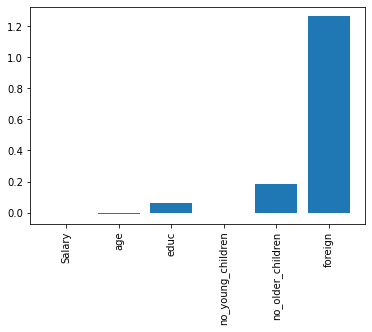

In [36]:
# Feature importance for logistic regression
print('Feature importance for logistic regression:')
importance = best_logit.coef_[0]
# Summarize feature importance
for i,v in enumerate(importance):
        print('Feature: %0s, Score: %.5f' % (df_holiday.drop('Holliday_Package', axis=1).columns[i],v))
# Plot feature importance
plt.bar([x for x in (df_holiday.drop('Holliday_Package', axis=1).columns)], importance)
plt.xticks(rotation=90)
plt.show()

Logistic Regression Model (Train Data):
Confusion Matrix:


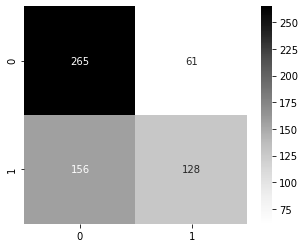

The classification report:
              precision    recall  f1-score   support

           0       0.63      0.81      0.71       326
           1       0.68      0.45      0.54       284

    accuracy                           0.64       610
   macro avg       0.65      0.63      0.63       610
weighted avg       0.65      0.64      0.63       610



In [37]:
# Confussion matrix and report for logistic regression and train data
print('Logistic Regression Model (Train Data):')
print('Confusion Matrix:')
plt.figure(figsize=(5,4))
sns.heatmap((metrics.confusion_matrix(y_train, ytrain_predict_logit)), annot=True, cmap='Greys', fmt='0.4g')
plt.show()
print('The classification report:')
print(metrics.classification_report(y_train, ytrain_predict_logit))

Logistic Regression Model (Test Data):
Confusion Matrix:


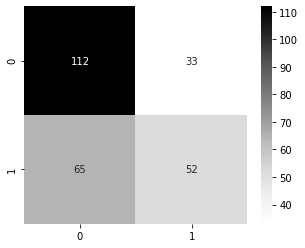

The classification report:
              precision    recall  f1-score   support

           0       0.63      0.77      0.70       145
           1       0.61      0.44      0.51       117

    accuracy                           0.63       262
   macro avg       0.62      0.61      0.61       262
weighted avg       0.62      0.63      0.61       262



In [38]:
# Confussion matrix and report for logistic regression and train data
print('Logistic Regression Model (Test Data):')
print('Confusion Matrix:')
plt.figure(figsize=(5,4))
sns.heatmap((metrics.confusion_matrix(y_test, ytest_predict_logit)), annot=True, cmap='Greys', fmt='0.4g')
plt.show()
print('The classification report:')
print(metrics.classification_report(y_test, ytest_predict_logit))

In [39]:
# Obtaining the train metrics into variables
logit_metrics=classification_report(y_train, ytrain_predict_logit, output_dict=True)
df=pd.DataFrame(logit_metrics).transpose()
logit_train_f1=round(df.loc["1"][2],2)
logit_train_recall=round(df.loc["1"][1],2)
logit_train_precision=round(df.loc["1"][0],2)
logit_train_acc=round(df.loc["accuracy"][2],2)

In [40]:
# Obtaining the test metrics into variables
logit_metrics=classification_report(y_test, ytest_predict_logit, output_dict=True)
df=pd.DataFrame(logit_metrics).transpose()
logit_test_f1=round(df.loc["1"][2],2)
logit_test_recall=round(df.loc["1"][1],2)
logit_test_precision=round(df.loc["1"][0],2)
logit_test_acc=round(df.loc["accuracy"][2],2)

AUC (Train): 0.670
AUC (Test): 0.660


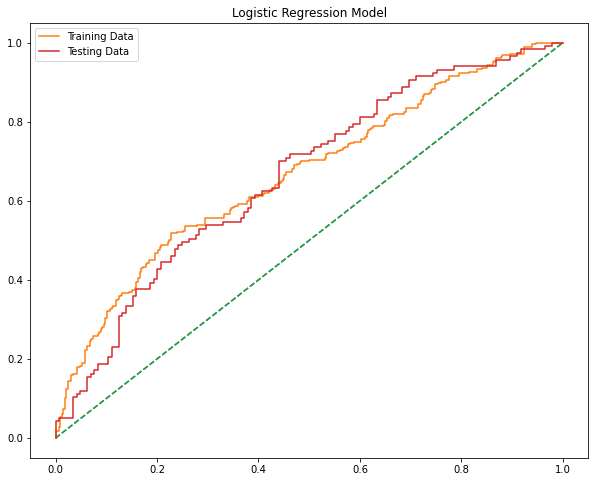

In [41]:
# ROC and AUC
plt.figure(figsize=(10,8))

# For train data
probs = best_logit.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
logit_train_auc = round(roc_auc_score(y_train, probs),2)
print('AUC (Train): %.3f' % logit_train_auc)
# calculate roc curve
logit_train_fpr, logit_train_tpr, logit_train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(logit_train_fpr, logit_train_tpr, label='Training Data')
plt.title('Logistic Regression Model')

# For test data
probs = best_logit.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
logit_test_auc = round(roc_auc_score(y_test, probs),2)
print('AUC (Test): %.3f' % logit_test_auc)
# calculate roc curve
logit_test_fpr, logit_test_tpr, logit_test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(logit_test_fpr, logit_test_tpr, label='Testing Data')
plt.legend(loc='best')
plt.show()

In [42]:
print('\n\n\033[1mLogistic Regression (All parameters in %)\033[0m')
index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
data = pd.DataFrame({'Logistic Regression (Train)':[logit_train_acc,logit_train_auc,logit_train_recall,logit_train_precision,logit_train_f1],
        'Logistic Regression (Test)':[logit_test_acc,logit_test_auc,logit_test_recall,logit_test_precision,logit_test_f1]},index=index)
logit_performance = round(data,2)*100
logit_performance



Logistic Regression (All parameters in %)


,Logistic Regression (Train),Logistic Regression (Test)
Accuracy,64.0,63.0
AUC,67.0,66.0
Recall,45.0,44.0
Precision,68.0,61.0
F1 Score,54.0,51.0


-----
### Linear Discriminant Analysis (LDA)

In [43]:
# Creating an instance of the model
clf = LinearDiscriminantAnalysis()

In [44]:
# Training the model
lda = clf.fit(X_train, y_train)

In [45]:
# Prediction for class
ytrain_predict_lda = lda.predict(X_train)
ytest_predict_lda = lda.predict(X_test)

Feature importance for logistic regression:
Feature: Salary, Score: -0.00002
Feature: age, Score: -0.00900
Feature: educ, Score: 0.06514
Feature: no_young_children, Score: -0.00000
Feature: no_older_children, Score: 0.18747
Feature: foreign, Score: 1.37651


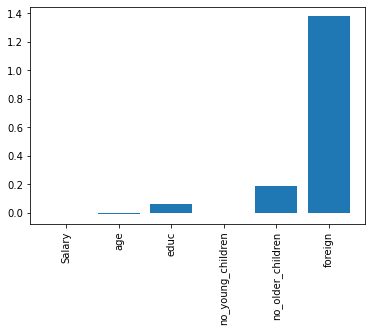

In [46]:
# Feature importance for LDA
print('Feature importance for logistic regression:')
importance = lda.coef_[0]
# Summarize feature importance
for i,v in enumerate(importance):
        print('Feature: %0s, Score: %.5f' % (df_holiday.drop('Holliday_Package', axis=1).columns[i],v))
# Plot feature importance
plt.bar([x for x in (df_holiday.drop('Holliday_Package', axis=1).columns)], importance)
plt.xticks(rotation=90)
plt.show()

LDA Model (Train Data):
Confussion Matrix:


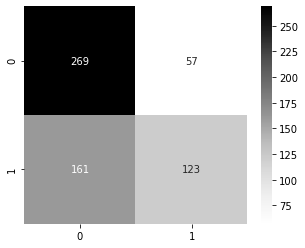

The clasification report:
              precision    recall  f1-score   support

           0       0.63      0.83      0.71       326
           1       0.68      0.43      0.53       284

    accuracy                           0.64       610
   macro avg       0.65      0.63      0.62       610
weighted avg       0.65      0.64      0.63       610



In [47]:
# Confussion matrix and report for LDA and train data
print('LDA Model (Train Data):')
print('Confussion Matrix:')
plt.figure(figsize=(5,4))
sns.heatmap((metrics.confusion_matrix(y_train, ytrain_predict_lda)), annot=True, cmap='Greys', fmt='0.4g')
plt.show()
print('The clasification report:')
print(metrics.classification_report(y_train, ytrain_predict_lda))

LDA Model (Test Data):
Confusion Matrix:


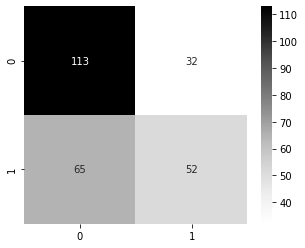

The classification report:
              precision    recall  f1-score   support

           0       0.63      0.78      0.70       145
           1       0.62      0.44      0.52       117

    accuracy                           0.63       262
   macro avg       0.63      0.61      0.61       262
weighted avg       0.63      0.63      0.62       262



In [48]:
# Confussion matrix and report for LDA and test data
print('LDA Model (Test Data):')
print('Confusion Matrix:')
plt.figure(figsize=(5,4))
sns.heatmap((metrics.confusion_matrix(y_test, ytest_predict_lda)), annot=True, cmap='Greys', fmt='0.4g')
plt.show()
print('The classification report:')
print(metrics.classification_report(y_test, ytest_predict_lda))

In [49]:
# Obtaining the train metrics into variables
lda_metrics=classification_report(y_train, ytrain_predict_lda, output_dict=True)
df=pd.DataFrame(lda_metrics).transpose()
lda_train_f1=round(df.loc["1"][2],2)
lda_train_recall=round(df.loc["1"][1],2)
lda_train_precision=round(df.loc["1"][0],2)
lda_train_acc=round(df.loc["accuracy"][2],2)

In [50]:
# Obtaining the test metrics into variables
lda_metrics=classification_report(y_test, ytest_predict_lda, output_dict=True)
df=pd.DataFrame(lda_metrics).transpose()
lda_test_f1=round(df.loc["1"][2],2)
lda_test_recall=round(df.loc["1"][1],2)
lda_test_precision=round(df.loc["1"][0],2)
lda_test_acc=round(df.loc["accuracy"][2],2)

AUC (Training Data): 0.670
AUC (Testing Data): 0.660


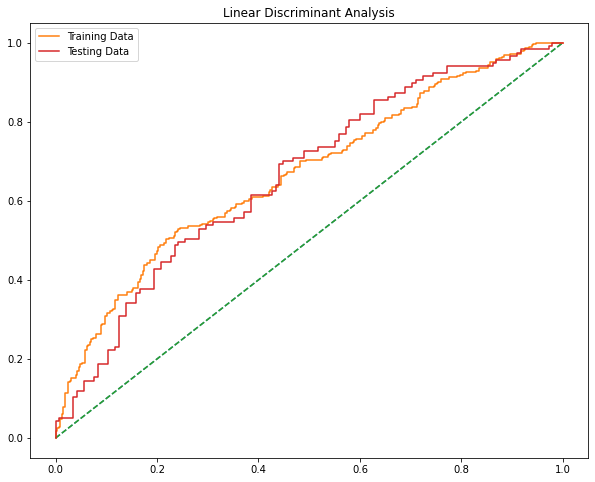

In [51]:
# ROC and AUC
plt.figure(figsize=(10,8))

# For train data
probs = lda.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
lda_train_auc = round(roc_auc_score(y_train, probs),2)
print('AUC (Training Data): %.3f' % lda_train_auc)
# calculate roc curve
lda_train_fpr, lda_train_tpr, lda_train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(lda_train_fpr, lda_train_tpr, label='Training Data')
plt.title('Linear Discriminant Analysis')

# For test data
probs = lda.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
lda_test_auc = round(roc_auc_score(y_test, probs),2)
print('AUC (Testing Data): %.3f' % lda_test_auc)
# calculate roc curve
lda_test_fpr, lda_test_tpr, lda_test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(lda_test_fpr, lda_test_tpr, label='Testing Data')
plt.title('Linear Discriminant Analysis')
plt.legend(loc='best')
plt.show()

In [52]:
print('\n\n\033[1mLinear Discriminant Analysis - LDA (All parameters in %)\033[0m')
index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
data = pd.DataFrame({'Linear Discriminant Analysis (Train)':[lda_train_acc,lda_train_auc,lda_train_recall,lda_train_precision,lda_train_f1],
        'Linear Discriminant Analysis (Test)':[lda_test_acc,lda_test_auc,lda_test_recall,lda_test_precision,lda_test_f1]},index=index)
lda_performance = round(data,2)*100
lda_performance



Linear Discriminant Analysis - LDA (All parameters in %)


,Linear Discriminant Analysis (Train),Linear Discriminant Analysis (Test)
Accuracy,64.0,63.0
AUC,67.0,66.0
Recall,43.0,44.0
Precision,68.0,62.0
F1 Score,53.0,52.0


In [53]:
# Obtaining the probability of the train and test data
pred_prob_train = lda.predict_proba(X_train)
pred_prob_test = lda.predict_proba(X_test)

----

### Linear Discriminant Analysis (LDA) with custom threshold/max likelihood

When the cut-off probability is 0.1
Accuracy: 0.466
F1-Score: 0.635
Confussion Matrix:


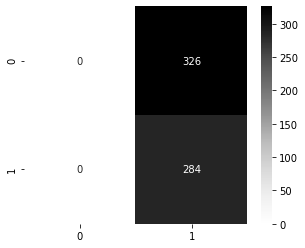

---------------------------------------------------------------


When the cut-off probability is 0.2
Accuracy: 0.472
F1-Score: 0.638
Confussion Matrix:


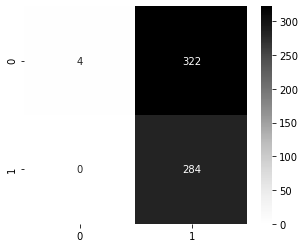

---------------------------------------------------------------


When the cut-off probability is 0.3
Accuracy: 0.523
F1-Score: 0.645
Confussion Matrix:


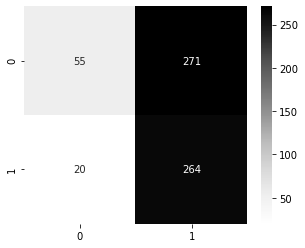

---------------------------------------------------------------


When the cut-off probability is 0.4
Accuracy: 0.597
F1-Score: 0.618
Confussion Matrix:


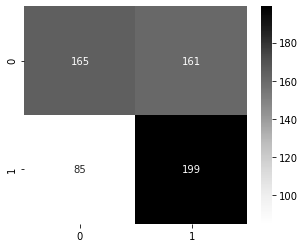

---------------------------------------------------------------


When the cut-off probability is 0.5
Accuracy: 0.643
F1-Score: 0.530
Confussion Matrix:


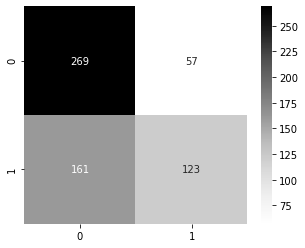

---------------------------------------------------------------


When the cut-off probability is 0.6
Accuracy: 0.633
F1-Score: 0.472
Confussion Matrix:


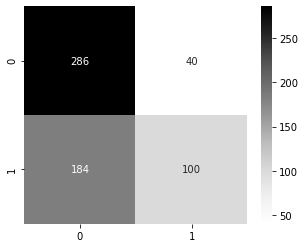

---------------------------------------------------------------


When the cut-off probability is 0.7
Accuracy: 0.608
F1-Score: 0.356
Confussion Matrix:


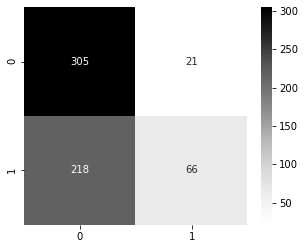

---------------------------------------------------------------


When the cut-off probability is 0.8
Accuracy: 0.538
F1-Score: 0.014
Confussion Matrix:


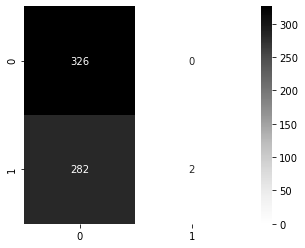

---------------------------------------------------------------


When the cut-off probability is 0.9
Accuracy: 0.534
F1-Score: 0.000
Confussion Matrix:


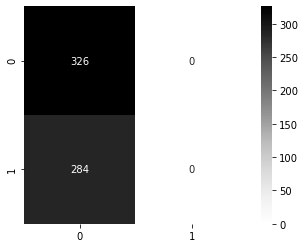

---------------------------------------------------------------




In [54]:
# We will perform the classification with the probability for various values of threshold
# We will then find the accuracy and F1 score for the different values
acc_mat=[]
f1_mat=[]
for j in np.arange(0.1, 1, 0.1):
    custom_prob = j # Defining the new cut off value of our choice
    custom_cutoff_data = [] # Initiating an empty list that will be used to store the dependent variables class
    for i in range(0, len(y_train)):
        if np.array(pred_prob_train[:,1][i]>custom_prob):
            a = 1 # If probability is greater than the cut off then 1
        else:
            a = 0 # If probability is lesser than the cut off then 0
        custom_cutoff_data.append(a) # Appending the class to the list of outputs
    
    # Displaying the confusion matrix along with the accuracy and F1 score for each case
    print('When the cut-off probability is %0.1f' %j)
    print('Accuracy: %0.3f'%(metrics.accuracy_score(y_train, custom_cutoff_data)))
    print('F1-Score: %0.3f'%(metrics.f1_score(y_train, custom_cutoff_data)))  
    acc_mat.append(metrics.accuracy_score(y_train, custom_cutoff_data))
    f1_mat.append(metrics.f1_score(y_train, custom_cutoff_data))
    print('Confussion Matrix:')
    plt.figure(figsize=(5,4))
    sns.heatmap((metrics.confusion_matrix(y_train, custom_cutoff_data)), annot=True, cmap='Greys', fmt='0.4g')
    plt.show()
    print('---------------------------------------------------------------\n\n')

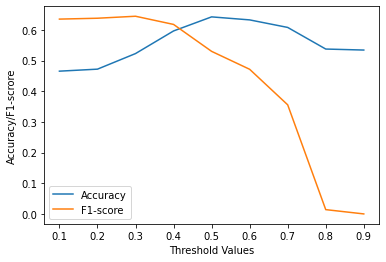

In [55]:
# Plotting the various values of accuracy and f1 values
plt.plot(np.arange(0.1, 1, 0.1), acc_mat, label='Accuracy')
plt.plot(np.arange(0.1, 1, 0.1), f1_mat, label='F1-score' )
plt.xlabel('Threshold Values')
plt.ylabel('Accuracy/F1-scrore')
plt.legend(loc='best')
plt.show()

We then analysed for various values of threshold and found that 0.3 is the threshold that needs to be maintained so as to get a good F1 score and a good precission.

LDA Model Custom Cut-off=0.3 (Train Data):
When the cut-off probability is 0.3
Confusion Matrix:


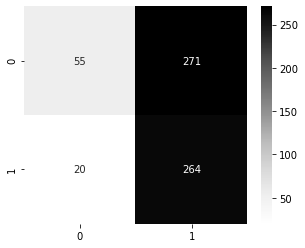

The classification report:
              precision    recall  f1-score   support

           0       0.73      0.17      0.27       326
           1       0.49      0.93      0.64       284

    accuracy                           0.52       610
   macro avg       0.61      0.55      0.46       610
weighted avg       0.62      0.52      0.45       610



In [56]:
# For the cut-off of 0.3

# Train data
print('LDA Model Custom Cut-off=0.3 (Train Data):')
custom_prob = 0.3
custom_cutoff_data_train = []
for i in range(0, len(y_train)):
    if np.array(pred_prob_train[:,1][i]>custom_prob):
        a = 1 # If probability is greater than the cut off then 1
    else:
        a = 0 # If probability is lesser than the cut off then 0
    custom_cutoff_data_train.append(a) # Appending the class to the list of outputs

# Displaying the confusion matrix along with the accuracy and F1 score for each case
print('When the cut-off probability is %0.1f' %custom_prob)
print('Confusion Matrix:')
plt.figure(figsize=(5,4))
sns.heatmap((metrics.confusion_matrix(y_train, custom_cutoff_data_train)), annot=True, cmap='Greys', fmt='0.4g')
plt.show()
print('The classification report:')
print(metrics.classification_report(y_train, custom_cutoff_data_train))

LDA Model Custom Cut-off=0.3 (Train Data):
When the cut-off probability is 0.3
Confusion Matrix:


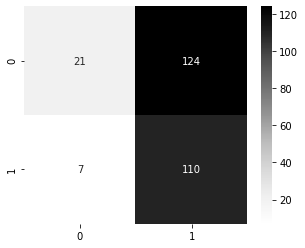

The classification report:
              precision    recall  f1-score   support

           0       0.75      0.14      0.24       145
           1       0.47      0.94      0.63       117

    accuracy                           0.50       262
   macro avg       0.61      0.54      0.43       262
weighted avg       0.62      0.50      0.41       262



In [57]:
# Test data
print('LDA Model Custom Cut-off=0.3 (Train Data):')
custom_prob = 0.3
custom_cutoff_data_test = []
for i in range(0, len(y_test)):
    if np.array(pred_prob_test[:,1][i]>custom_prob):
        a = 1 # If probability is greater than the cut off then 1
    else:
        a = 0 # If probability is lesser than the cut off then 0
    custom_cutoff_data_test.append(a) # Appending the class to the list of outputs

# Displaying the confusion matrix along with the accuracy and F1 score for each case
print('When the cut-off probability is %0.1f' %custom_prob)  
print('Confusion Matrix:')
plt.figure(figsize=(5,4))
sns.heatmap((metrics.confusion_matrix(y_test, custom_cutoff_data_test)), annot=True, cmap='Greys', fmt='0.4g')
plt.show()
print('The classification report:')
print(metrics.classification_report(y_test, custom_cutoff_data_test))

In [58]:
# Obtaining the train metrics into variables
lda_metrics=classification_report(y_train, custom_cutoff_data_train, output_dict=True)
df=pd.DataFrame(lda_metrics).transpose()
ldacust_train_f1=round(df.loc["1"][2],2)
ldacust_train_recall=round(df.loc["1"][1],2)
ldacust_train_precision=round(df.loc["1"][0],2)
ldacust_train_acc=round(df.loc["accuracy"][2],2)

In [59]:
# Obtaining the test metrics into variables
lda_metrics=classification_report(y_test, custom_cutoff_data_test, output_dict=True)
df=pd.DataFrame(lda_metrics).transpose()
ldacust_test_f1=round(df.loc["1"][2],2)
ldacust_test_recall=round(df.loc["1"][1],2)
ldacust_test_precision=round(df.loc["1"][0],2)
ldacust_test_acc=round(df.loc["accuracy"][2],2)

In [60]:
print('\n\n\033[1mLinear Discriminant Analysis - LDA [Custom threshold of 0.3] (All parameters in %)\033[0m')
index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
data = pd.DataFrame({'Linear Discriminant Analysis [Thresh>0.3] (Train)':[ldacust_train_acc,lda_train_auc,ldacust_train_recall,ldacust_train_precision,ldacust_train_f1],
        'Linear Discriminant Analysis [Thresh>0.3] (Test)':[ldacust_test_acc,lda_test_auc,ldacust_test_recall,ldacust_test_precision,ldacust_test_f1]},index=index)
ldacust_performance = round(data,2)*100
ldacust_performance



Linear Discriminant Analysis - LDA [Custom threshold of 0.3] (All parameters in %)


,Linear Discriminant Analysis [Thresh>0.3] (Train),Linear Discriminant Analysis [Thresh>0.3] (Test)
Accuracy,52.0,50.0
AUC,67.0,66.0
Recall,93.0,94.0
Precision,49.0,47.0
F1 Score,64.0,63.0


-------

## Model Comparison

In [61]:
# We will consolidate all the model metrics
consolidate_models = pd.concat([logit_performance, lda_performance, ldacust_performance], axis=1)
consolidate_models

,Logistic Regression (Train),Logistic Regression (Test),Linear Discriminant Analysis (Train),Linear Discriminant Analysis (Test),Linear Discriminant Analysis [Thresh>0.3] (Train),Linear Discriminant Analysis [Thresh>0.3] (Test)
Accuracy,64.0,63.0,64.0,63.0,52.0,50.0
AUC,67.0,66.0,67.0,66.0,67.0,66.0
Recall,45.0,44.0,43.0,44.0,93.0,94.0
Precision,68.0,61.0,68.0,62.0,49.0,47.0
F1 Score,54.0,51.0,53.0,52.0,64.0,63.0


In [62]:
# For ease of analysing the metrics let us split the test and train into separate data frames
consolidate_models_train = consolidate_models[['Logistic Regression (Train)', 'Linear Discriminant Analysis (Train)', 'Linear Discriminant Analysis [Thresh>0.3] (Train)']]
consolidate_models_train.style.highlight_max(color = 'lightgreen', axis = 1)

,Logistic Regression (Train),Linear Discriminant Analysis (Train),Linear Discriminant Analysis [Thresh>0.3] (Train)
Accuracy,64.000000,64.000000,52.000000
AUC,67.000000,67.000000,67.000000
Recall,45.000000,43.000000,93.000000
Precision,68.000000,68.000000,49.000000
F1 Score,54.000000,53.000000,64.000000


In [63]:
consolidate_models_test = consolidate_models[['Logistic Regression (Test)', 'Linear Discriminant Analysis (Test)', 'Linear Discriminant Analysis [Thresh>0.3] (Test)']]
consolidate_models_test.style.highlight_max(color = 'lightgreen', axis = 1)

,Logistic Regression (Test),Linear Discriminant Analysis (Test),Linear Discriminant Analysis [Thresh>0.3] (Test)
Accuracy,63.000000,63.000000,50.000000
AUC,66.000000,66.000000,66.000000
Recall,44.000000,44.000000,94.000000
Precision,61.000000,62.000000,47.000000
F1 Score,51.000000,52.000000,63.000000


Recommendations:
-	The order of top 3 important features are:

            a.	Foreign
            b.	Number of older children
            c.	Number of years education
-	To target the foreign travellers we must increase the marketing in airports, railway stations and travel agencies.
-	We also should target more on the middle aged working professions who are more likely to be educated and having an older child.
-	Since the data has a no:yes ratio of 54:45, for 1000USD of an investment and a customer acquisition cost of 10USD. We will get only 45 customers who will buy the package.
If the model is used and the predicted set of customers were provided with the package offer, the churn will be 94 people given the same above situation.

# --------------------------------------------------------------------------------------------